In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [4]:
# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data])
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# 데이터셋 표준화
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [6]:
# 데이터 프레임으로 자료형 변환 및 target class 정보 추가
df_scaled = pd.DataFrame(df_scaled, columns= ['sepal length', 'sepal width', 'petal length', 'petal width'])
df_scaled['target'] = iris.target

df_scaled

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


PCA 알고리즘 불러오기 및 실행

In [7]:
from sklearn.decomposition import PCA

# 2차원으로 차원 축소, target 정보는 제외
pca = PCA(n_components = 2)
pca.fit(df_scaled.iloc[:,:-1])

# pca transform 후 데이터프레임으로 자료형 변경
df_pca = pca.transform(df_scaled.iloc[:,:-1])
df_pca = pd.DataFrame(df_pca, columns = ['component 0', 'component 1'])


In [8]:
df_pca

,component 0,component 1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [9]:
# PCA 주성분 설명력 출력

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


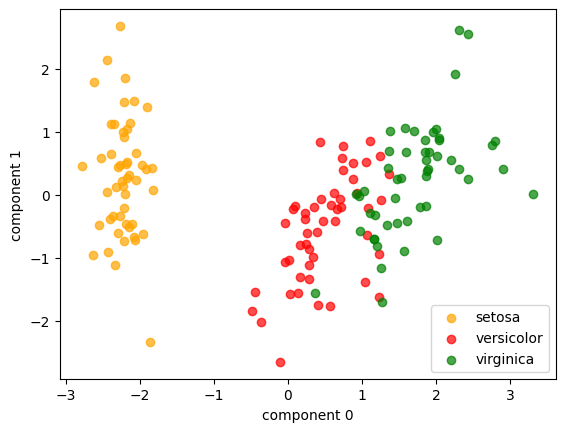

In [10]:
import matplotlib.pyplot as plt

# class target 정보 불러오기
df_pca['target'] = df_scaled['target']

# target 별 분리
df_pca_0 = df_pca[df_pca['target'] == 0]
df_pca_1 = df_pca[df_pca['target'] == 1]
df_pca_2 = df_pca[df_pca['target'] == 2]

# target 별 시각화
plt.scatter(df_pca_0['component 0'], df_pca_0['component 1'], color = 'orange', alpha = 0.7, label = 'setosa')
plt.scatter(df_pca_1['component 0'], df_pca_1['component 1'], color = 'red', alpha = 0.7, label = 'versicolor')
plt.scatter(df_pca_2['component 0'], df_pca_2['component 1'], color = 'green', alpha = 0.7, label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()